# Azted G-dDT Test Run

In [21]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [22]:
from aztec_gddt.experiment import standard_run

sim_df = standard_run()


In [23]:
sim_df.current_process.map(lambda x: x.leading_sequencer if x is not None else None).dropna().value_counts()

current_process
969c4c37-929d-4fe4-a023-5d5f44a7059f    253
8b72fe1d-1bd2-4ee6-b783-ef748e254180    247
b3250dbd-6b24-44d2-b9fe-178700628591    126
Name: count, dtype: int64

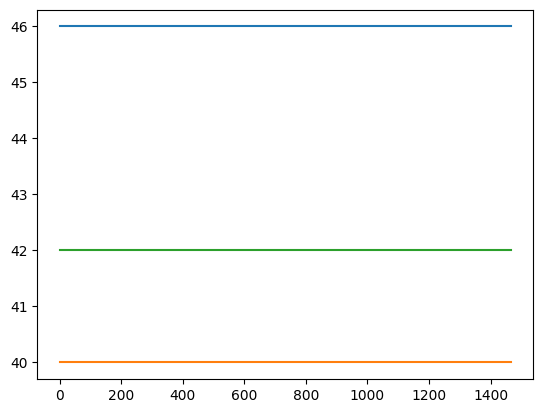

In [24]:
agent_labels = [i for i in sim_df['agents'].iloc[0].keys() if type(i) != str]
x = sim_df.time_l1
fig_df = sim_df.copy()
for i in agent_labels:
    fig_df[f'agent_{i}_staked'] = sim_df.agents.map(lambda x: x[i].staked_amount)
    y_i = fig_df[f'agent_{i}_staked']
    plt.plot(x, y_i)

<Axes: >

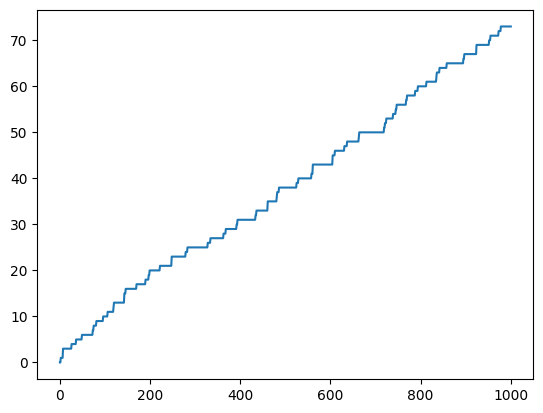

In [25]:
sim_df.transactions.map(lambda x: len(x))

from aztec_gddt.types import *

fig_df['proposal_tx_count'] = sim_df.transactions.map(lambda tx_dict: len(list(v for v in tx_dict.values() if isinstance(v, Proposal))))
fig_df.proposal_tx_count.plot()

In [26]:
fig_df.proposal_tx_count

0        0
1        0
2        1
3        1
4        1
        ..
996     73
997     73
998     73
999     73
1000    73
Name: proposal_tx_count, Length: 1001, dtype: int64

<Axes: xlabel='timestep', ylabel='time_l1'>

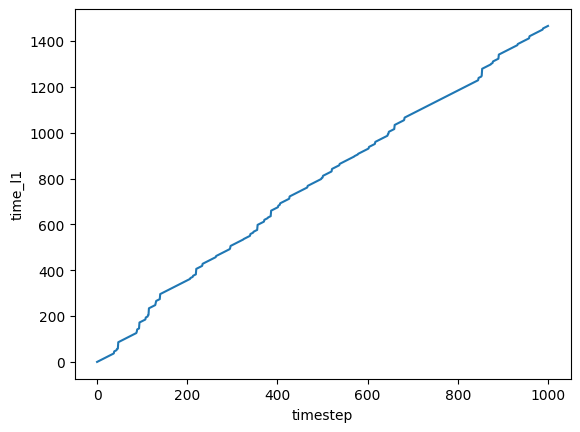

In [27]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [28]:
sim_df.head(4)

,subset,simulation,run,timestep,time_l1,delta_l1_blocks,advance_l1_blocks,slashes_to_provers,slashes_to_sequencers,total_rewards_provers,...,gwei_to_tokens,gas_estimators,tx_estimators,slash_params,commit_bond_amount,op_cost_sequencer,op_cost_prover,safety_factor_commit_bond,safety_factor_reveal_content,safety_factor_rollup_proof
0,0,0,1,0,0,0,0,0.0,0.0,0.0,...,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",16.0,0,0,0.0,0.0,0.0
1,0,0,1,1,1,0,0,0.0,0.0,0.0,...,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",16.0,0,0,0.0,0.0,0.0
2,0,0,1,2,2,0,0,0.0,0.0,0.0,...,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",16.0,0,0,0.0,0.0,0.0
3,0,0,1,3,3,0,0,0.0,0.0,0.0,...,1.000000e-09,L1GasEstimators(proposal=<function <lambda> at...,UserTransactionEstimators(transaction_count=<f...,"SlashParameters(failure_to_commit_bond=2.0, fa...",16.0,0,0,0.0,0.0,0.0


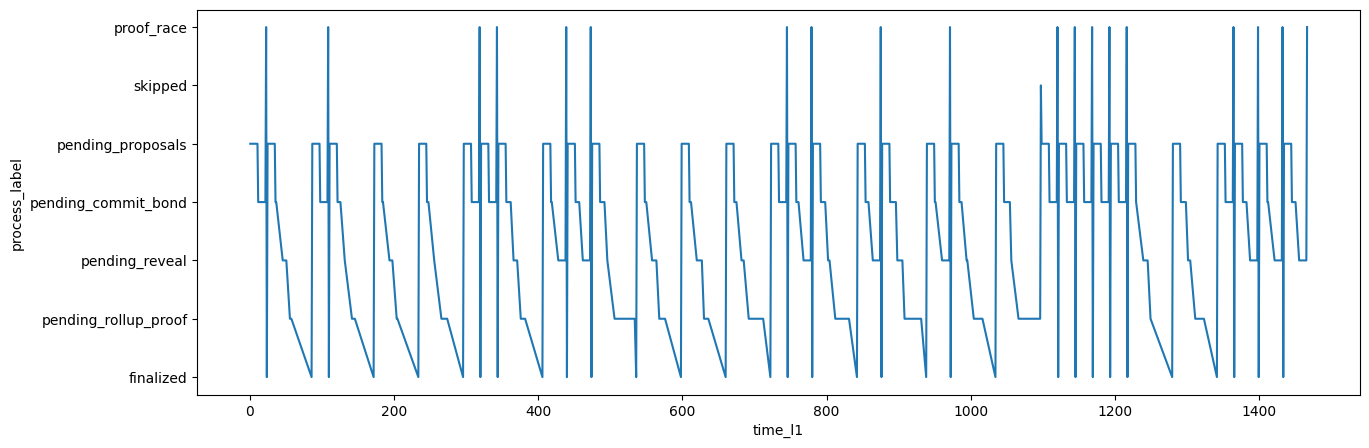

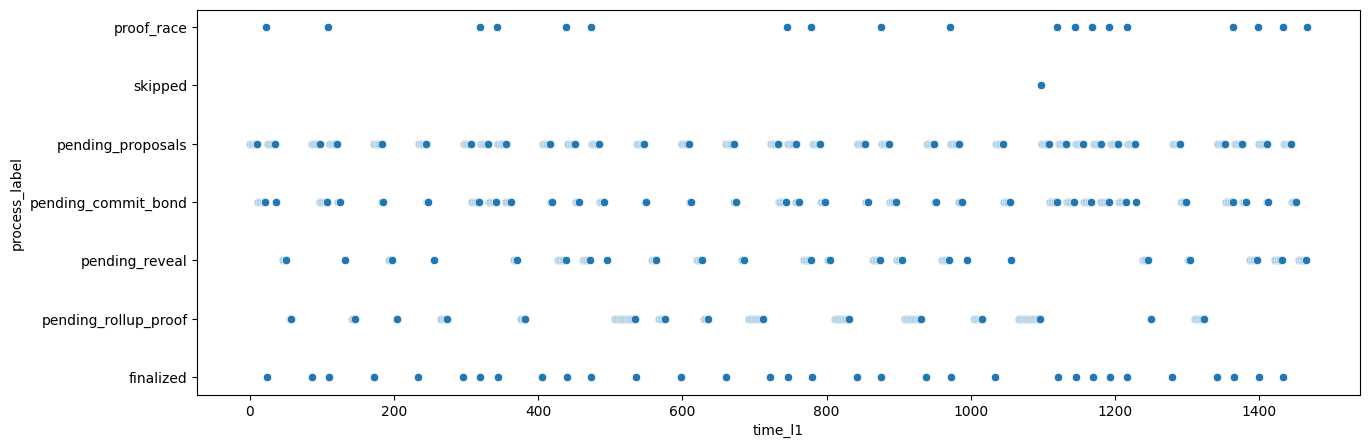

In [29]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [30]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                    None
1       pending_proposals
2       pending_proposals
3       pending_proposals
4       pending_proposals
              ...        
1462       pending_reveal
1463       pending_reveal
1464       pending_reveal
1465       pending_reveal
1466           proof_race
Name: process_label, Length: 1001, dtype: object

In [31]:
sim_df.iloc[-1]

subset                                                                                   0
simulation                                                                               0
run                                                                                      1
timestep                                                                              1000
time_l1                                                                               1466
delta_l1_blocks                                                                          0
advance_l1_blocks                                                                        0
slashes_to_provers                                                                     1.0
slashes_to_sequencers                                                                 11.0
total_rewards_provers                                                             2.577181
total_rewards_relays                                                              0.085906

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

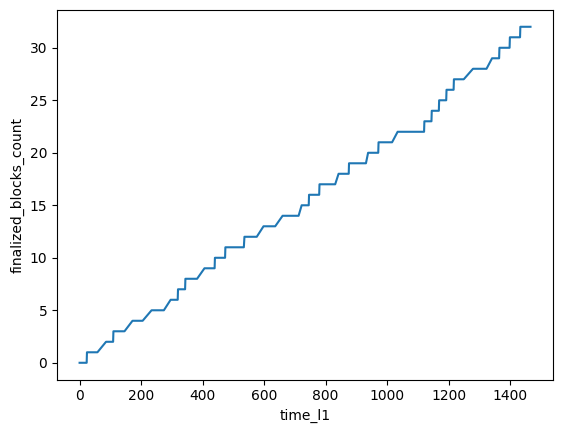

In [32]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

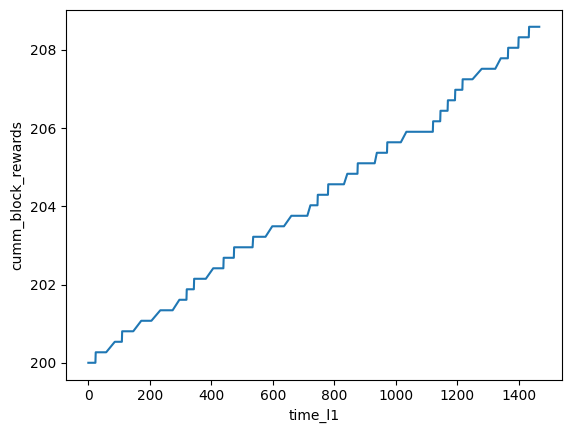

In [33]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

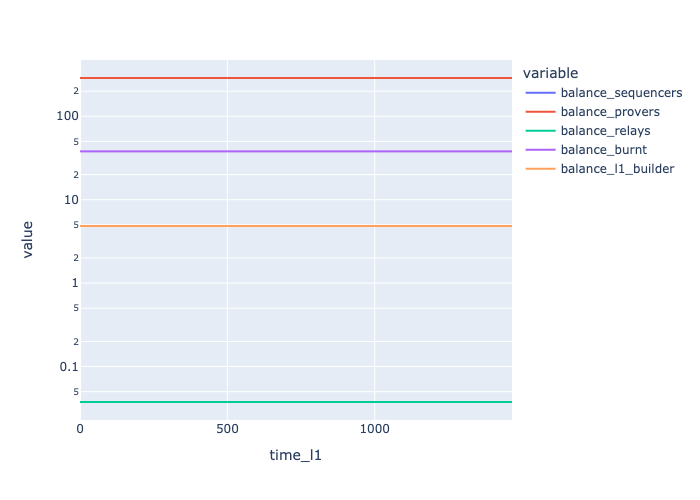

In [34]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

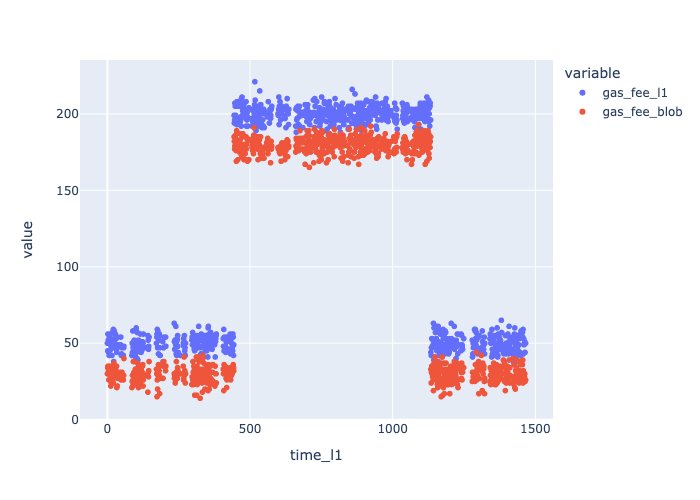

In [35]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

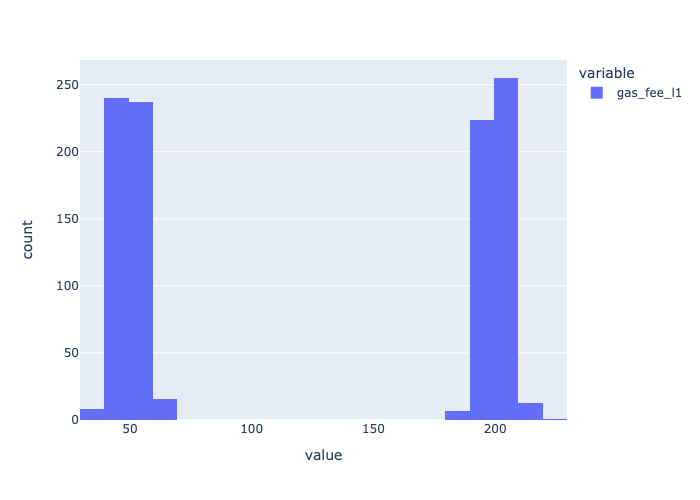

In [36]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

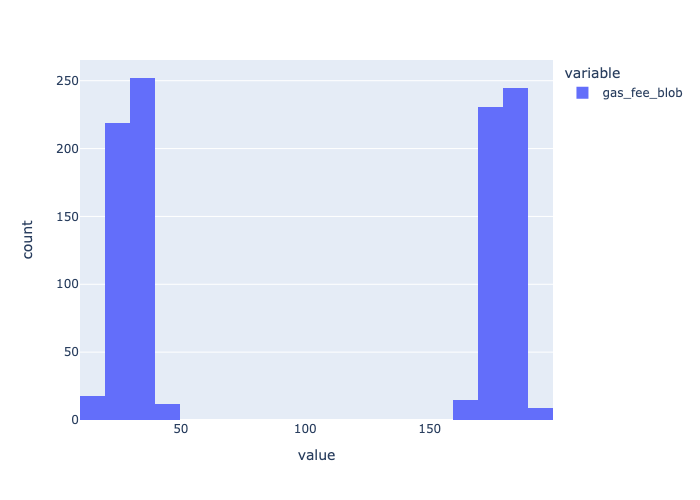

In [37]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

In [38]:
sim_df.gas_fee_l1.min()

37.0

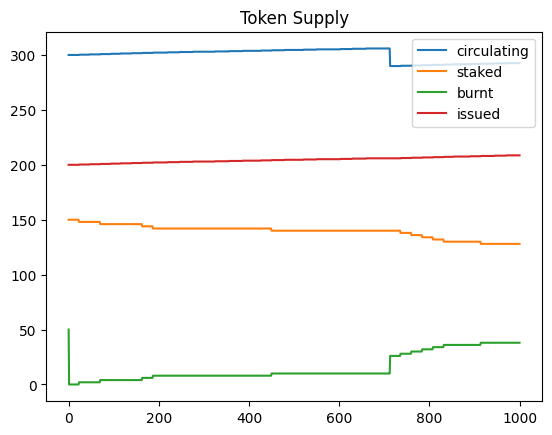

In [39]:
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__))
ts_df.plot(kind='line')
plt.title("Token Supply")
plt.show()

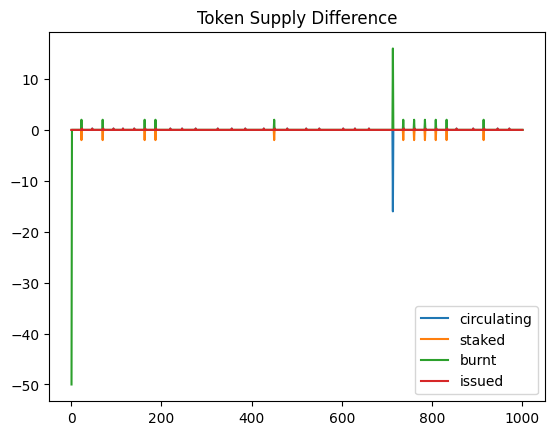

In [40]:
ts_df = sim_df.token_supply.apply(lambda x: pd.Series(x.__dict__)).diff()
ts_df.plot(kind='line')
plt.title("Token Supply Difference")
plt.show()